# <center>🔻**REGULARIZATION**</center>

- ➡️ **This is a form of regression, that constrains/regularizes or shrinks the coefficient estimates towards zero.**
  
- ➡️ **This technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting**

#### <center><span style="color: red;">**Regularization can achieve this motive with 3 techniques**</span></center>

- Lasso Regularization /L1
- Ridge Regualrization /L2
- Elastic Net Combination of L1 and L2

## <center>👉 <span>**LASSO**</span> <span style="color: blue;">**REGULARIZATION (L1)</span>**</center>

- **This is a regularization technique used in feature selection using a shrinkage method also referred to as the penalized regression method**
- **Lasso Regression magnitude of coefficiecnts can be exactly zero.**

$$
\text{Cost function} = \text{Loss} + \lambda \times \sum \| W \|
$$

- **Loss** = sum of squared residual
- $\lambda$ = penalty
- **w** = slope of the curve (modulus summation of all the slopes)

## <center>👉 <span>**Ridge**</span> <span style="color: blue;">**REGULARIZATION (L2)</span>**</center>

- **Ridge Regression also known as L2 regualarization, is an extension to Linear Regression that introduces a regularization term to reduce model complexity and help prevent overfitting.**

- **Ridge Regression's coefficients magnitude can be almost equal to zero but it never becomes zero unlike L1**

$$
\text{Cost function} = \text{Loss} + \lambda \times \sum \| W \|
$$

- **Loss** = sum of squared residual
- $\lambda$ = penalty
- **w** = slope of the curve (modulus summation of all the slopes)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
dataset = pd.read_csv("HousePrice.csv")
dataset.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [19]:
dataset.shape

(21613, 21)

In [22]:
df = dataset.iloc[:,2:]

### ➡️ Checking the Linearity of the data using correlation matrix
> **a correlation matrix can indicate the linearity of the relationship between independent and dependent variables, but it has limitations**. A correlation coefficient measures the strength and direction of a linear relationship, so a value close to \(1\) or \(-1\) suggests a strong linear relationship, while a value near \(0\) indicates a weak or non-existent one. However, a strong non-linear relationship may show a low correlation coefficient, as it assumes the data points cluster around a straight line, not a curve

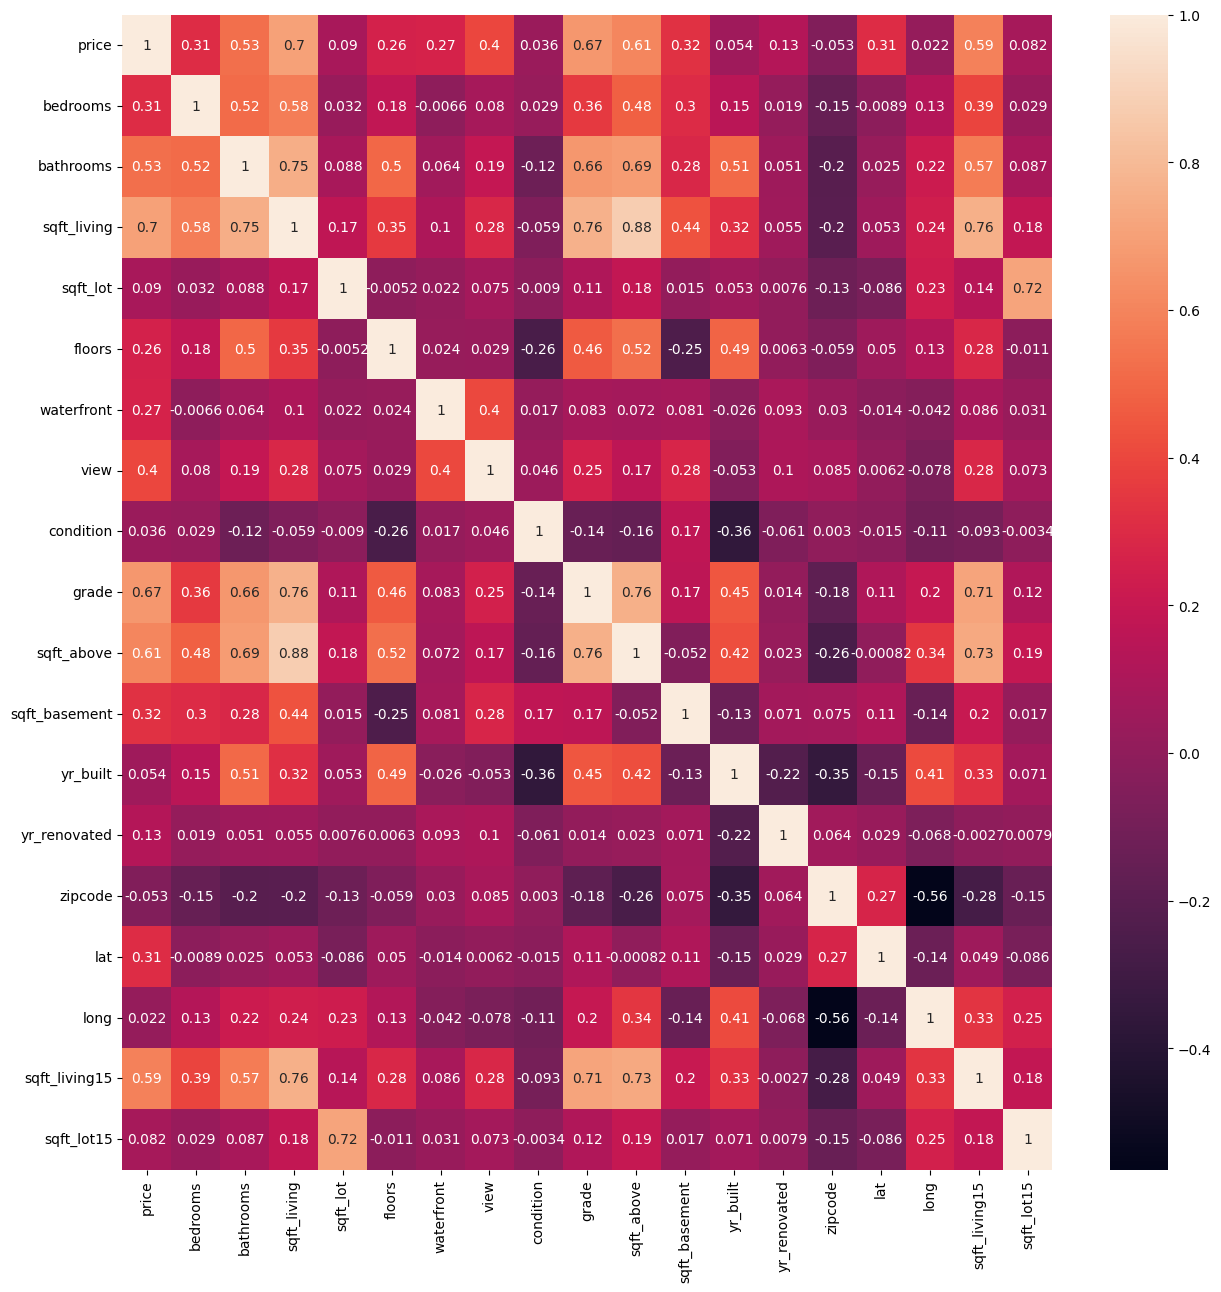

In [41]:
plt.figure(figsize = (15,15))
sns.heatmap(data = df.corr(), annot=True)
plt.show()

In [23]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [35]:
x = df.iloc[:,1:]
print(x.ndim)
x.head(1)

2


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [37]:
y = df["price"]
print(y.ndim)


1


### ➡️ Now Scaling the data to make it on the same scale

In [43]:
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [44]:
x = pd.DataFrame( data = sc.transform(x), columns = sc.get_feature_names_out())

In [45]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-1.473841,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.398669,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-1.473841,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.676503,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.398669,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849


### ➡️ Now Train Test Splitting

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state = 21)


### ➡️ Now Importing LinearRegression, Lasso, Ridge 

In [49]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# ➡️ **Multiple Linear Regression without L1 / L2**

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error  

In [50]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [51]:
lr.score(x_test,y_test)

0.7062844953850117

In [52]:
lr.coef_

array([-32255.53371901,  29931.61586733,  82985.27759943,   5433.34116238,
         2212.0097159 ,  53206.36679843,  41266.8975131 ,  17474.89111854,
       110658.8711166 ,  77740.66404121,  26754.1753807 , -73454.63346632,
         9088.82071053, -32283.26350631,  83792.04664323, -31414.3243728 ,
        13541.67878227, -10405.34689233])

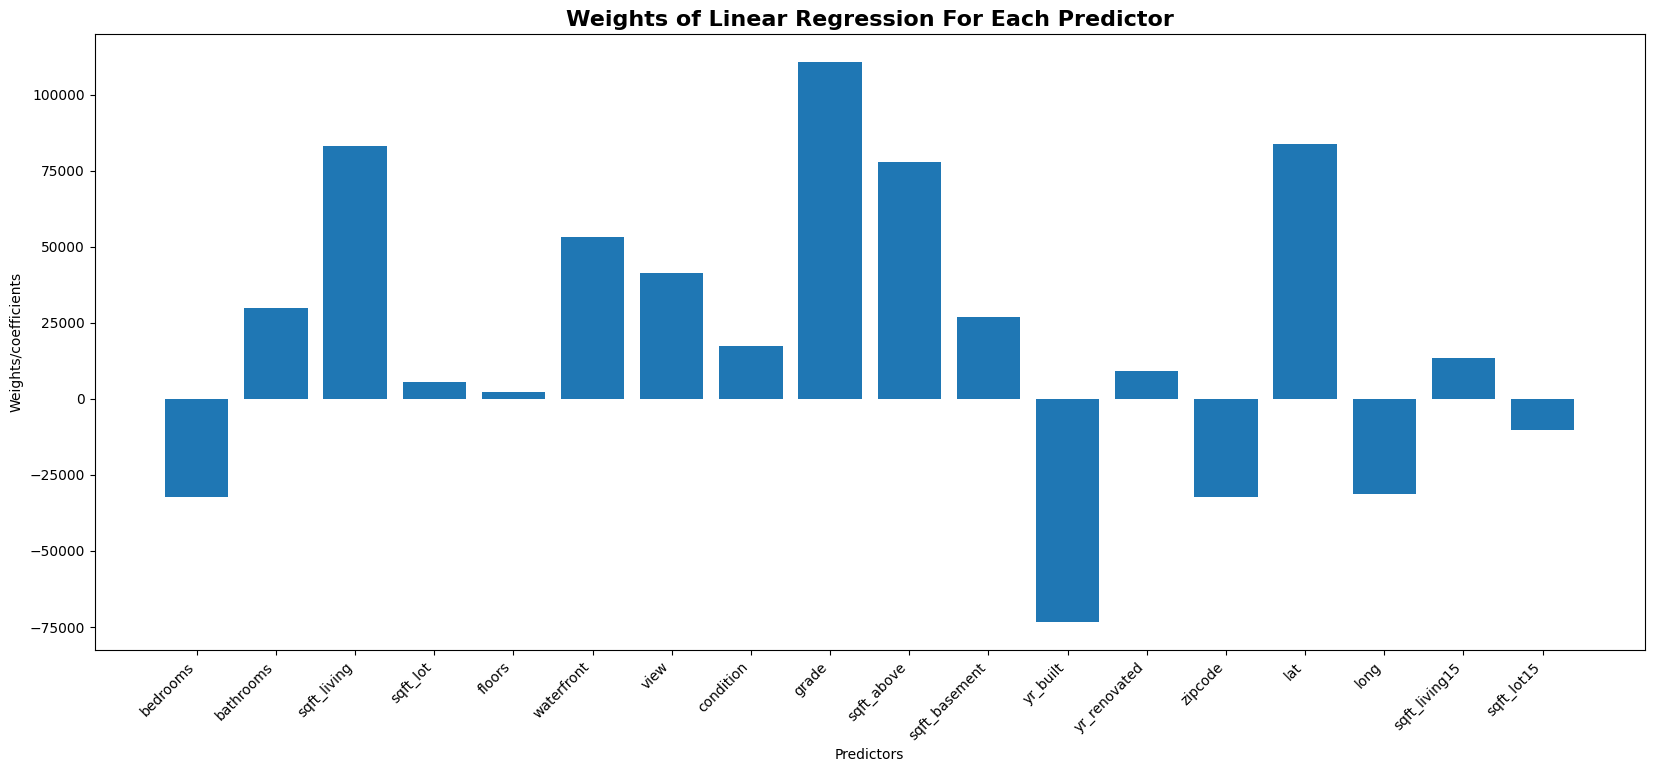

In [60]:
plt.figure(figsize= (20,8))
plt.bar(x.columns,lr.coef_)
plt.xticks(rotation = 45, ha = "right") # 'ha' (horizontal alignment) helps position labels nicely
plt.title("Weights of Linear Regression For Each Predictor",fontweight = "bold", fontsize = 16)
plt.xlabel("Predictors")
plt.ylabel("Weights/coefficients")
plt.show()

In [110]:
y_pred = lr.predict(x_test)
print(f"r2_score : {r2_score(y_test,y_pred)}")
print(f"mean_squared_error : {mean_squared_error(y_test,y_pred)}")
print(f"mean_absolute_error : {mean_absolute_error(y_test, y_pred)}")

r2_score : 0.7062844953850117
mean_squared_error : 39089785179.412125
mean_absolute_error : 126521.68904994828


# ➡️ **Now Using Lasso (L1)**

In [86]:
la = Lasso(alpha = 0.5)
la.fit(x_train,y_train)

/home/akash/myEnv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.219e+13, tolerance: 2.337e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

In [87]:
la.score(x_test,y_test)

0.7062844049855926

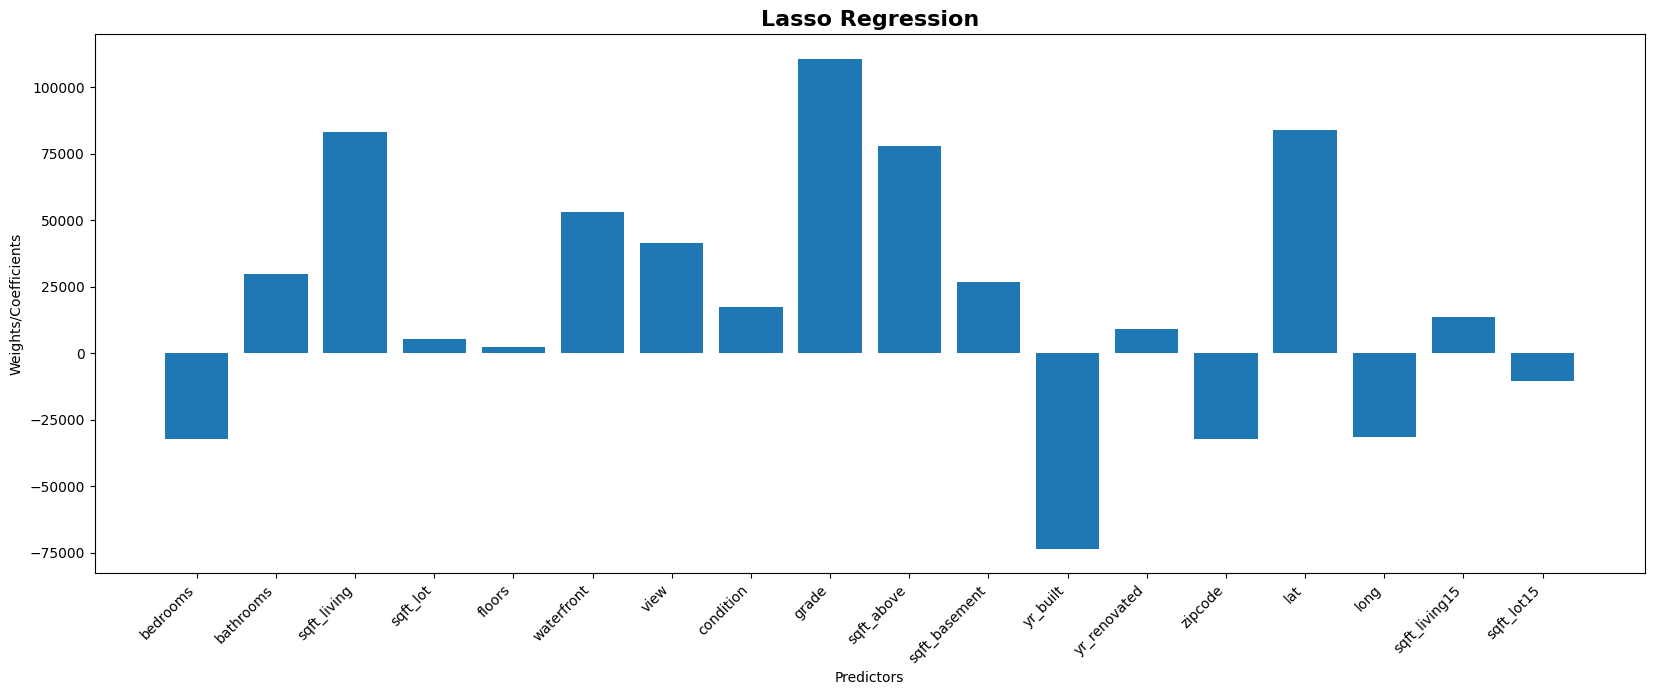

In [88]:
plt.figure(figsize = (20,7))
plt.bar(x.columns, lr.coef_)
plt.title("Lasso Regression", fontweight = 'bold', fontsize = 16)
plt.xticks(rotation = 45, ha = "right")
plt.xlabel("Predictors")
plt.ylabel("Weights/Coefficients")
plt.show()

In [107]:
y_pred = la.predict(x_test)

In [109]:
y_pred = la.predict(x_test)
print(f"r2_score : {r2_score(y_test,y_pred)}")
print(f"mean_squared_error : {mean_squared_error(y_test,y_pred)}")
print(f"mean_absolute_error : {mean_absolute_error(y_test, y_pred)}")

r2_score : 0.7062844049855926
mean_squared_error : 39089797210.4211
mean_absolute_error : 126521.66259983052


# ➡️ **Now using Ridge (L2)**

In [97]:
ri = Ridge(alpha = 0.1)
ri.fit(x_train, y_train)

Ridge(alpha=0.1)

In [98]:
ri.score(x_test, y_test)

0.7062844527741562

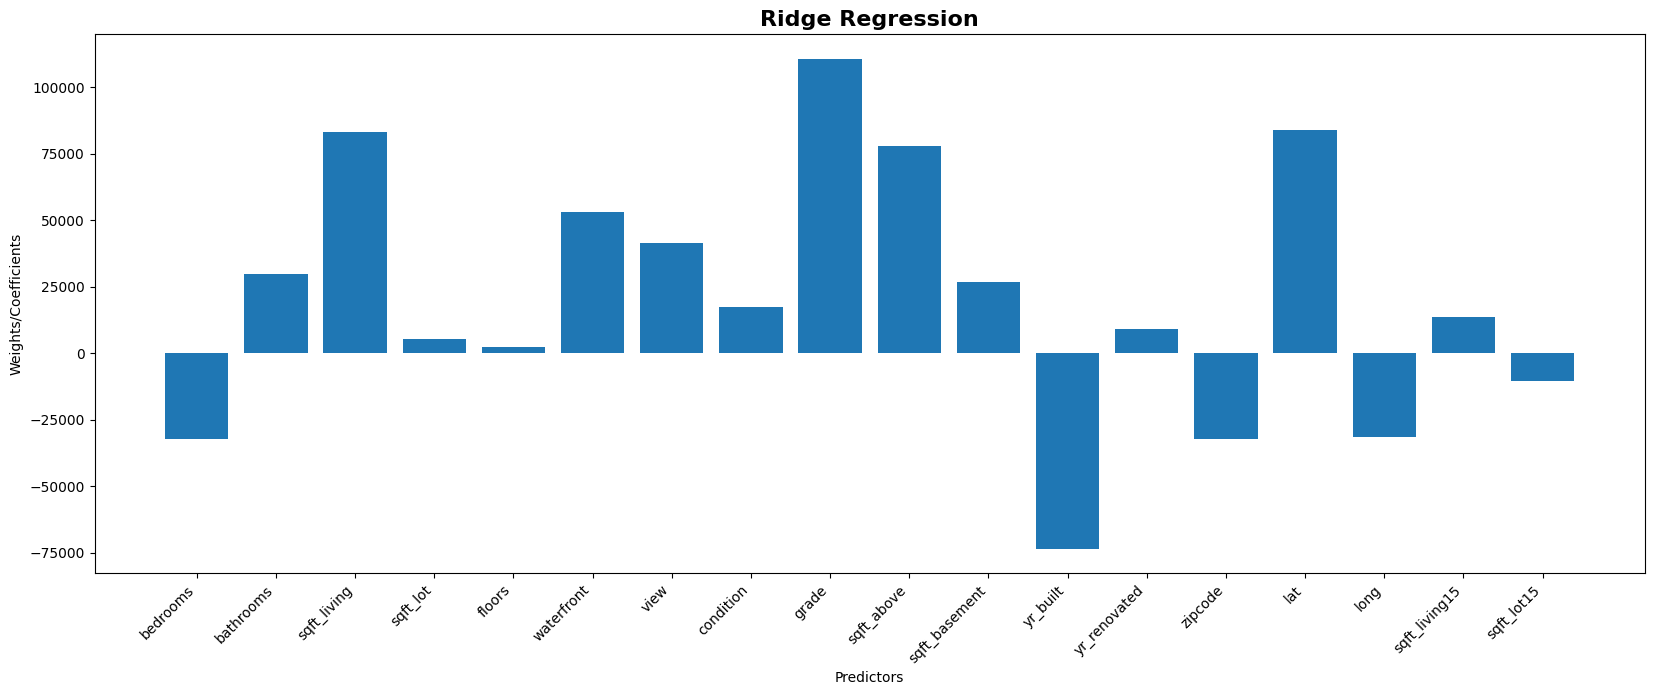

In [99]:
plt.figure(figsize = (20,7))
plt.bar(x.columns, ri.coef_)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Ridge Regression', fontweight= "bold", fontsize = 16)
plt.xlabel("Predictors")
plt.ylabel("Weights/Coefficients")
plt.show()

In [111]:
y_pred = lr.predict(x_test)
print(f"r2_score : {r2_score(y_test,y_pred)}")
print(f"mean_squared_error : {mean_squared_error(y_test,y_pred)}")
print(f"mean_absolute_error : {mean_absolute_error(y_test, y_pred)}")

r2_score : 0.7062844953850117
mean_squared_error : 39089785179.412125
mean_absolute_error : 126521.68904994828


In [113]:
df1 = pd.DataFrame({"col_name": x.columns, "LinearRegression":lr.coef_, "Lasso Regularization":la.coef_, "Ridge Regularization": ri.coef_}),

In [114]:
df1

(         col_name  LinearRegression  Lasso Regularization  Ridge Regularization
 0        bedrooms     -32255.533719         -32254.956035         -32254.879739
 1       bathrooms      29931.615867          29928.351507          29931.547700
 2     sqft_living      82985.277599         260571.691618          82984.737534
 3        sqft_lot       5433.341162           5431.770446           5433.309824
 4          floors       2212.009716           2211.863263           2212.210431
 5      waterfront      53206.366798          53205.970272          53206.122560
 6            view      41266.897513          41266.926847          41266.906091
 7       condition      17474.891119          17474.354107          17475.023096
 8           grade     110658.871117         110660.123703         110657.668188
 9      sqft_above      77740.664041         -82372.702061          77740.054608
 10  sqft_basement      26754.175381         -58818.349634          26754.194936
 11       yr_built     -7345